<h1 align="center"> Homework 16.1 </h1>

    Caelan Osman
    March 6, 2022

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cvxpy as cp

### Exercise 16.1

Vector:  0
Number of vectors inside band:  352
Vector:  1
Number of vectors inside band:  342
Vector:  2
Number of vectors inside band:  343
Vector:  3
Number of vectors inside band:  354
Vector:  4
Number of vectors inside band:  334

Number of vectors in all bands:  81

Band width to gurantee all points are in all bands:  0.9044271909999159


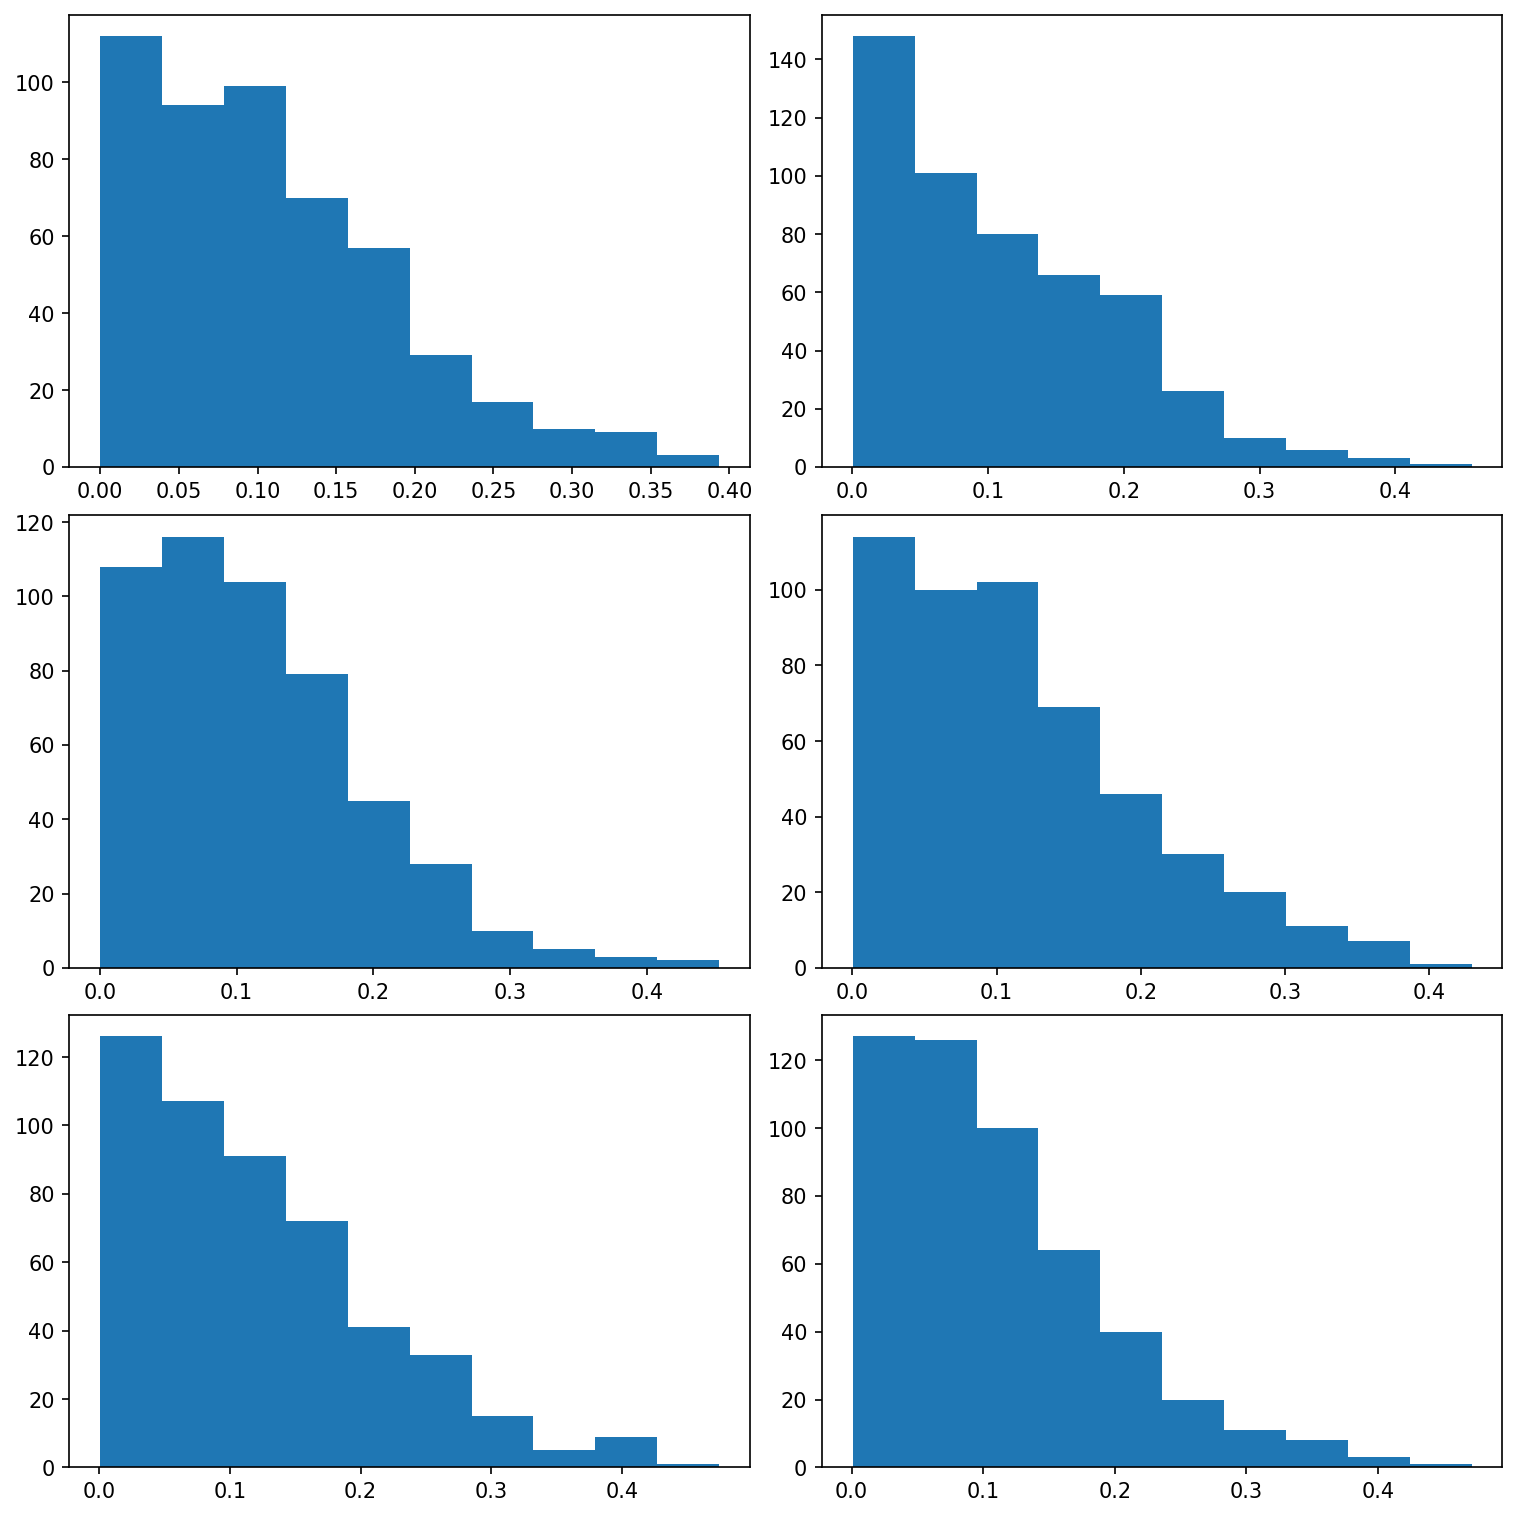

In [2]:
def problem16_1():

    # get 500 points on surface
    points = []
    for _ in range(500):
        new = np.random.uniform(low=-1, high=1, size=50)
        new /= np.linalg.norm(new, ord=2)
        points.append(new)


    ######################
    # Part 1
    #####################

    # get 5 additional points
    additional = []
    for _ in range(5):
        new = np.random.uniform(low=-1, high=1, size=50)
        new /= np.linalg.norm(new, ord=2)
        additional.append(new)
    # create count dictionary for how many vecotrs are in each band 
    count_dict = {i: 0 for i in range(5)}
    # create list for which indices of vectors are in all bands
    all_list = []
    for i, north in enumerate(additional):
        for j, vec in enumerate(points):
            # get projection
            projection = np.inner(vec, north) * north / (np.linalg.norm(north, ord=2)**2)
            # see if norm of projection is less than 1/root(50)
            if np.linalg.norm(projection, ord=2) <= 1/np.sqrt(50):
                count_dict[i] += 1 
                # check which vectors are in all bands
                if i == 0:
                    all_list.append(j)

            else:
                if i != 0:
                    try:
                        all_list.remove(j)
                    except ValueError:
                        continue

    for i in list(count_dict.keys()):
        print("Vector: ", i)
        print("Number of vectors inside band: ", count_dict[i])

    print("\nNumber of vectors in all bands: ", len(all_list))

    bandwidth = 1/np.sqrt(5) + 1/1000
    while not np.allclose(list(count_dict.values()), 500*np.ones(5)):
        count_dict = {i: 0 for i in range(5)}
        for i, north in enumerate(additional):
            for vec in points:
                # get projection
                projection = np.inner(vec, north) * north / (np.linalg.norm(north, ord=2)**2)
                # see if norm of projection is less than 1/root(50)
                if np.linalg.norm(projection, ord=2) <= bandwidth:
                    count_dict[i] += 1 

        bandwidth += 1/1000


    print("\nBand width to gurantee all points are in all bands: ", 2*bandwidth)

    ######################
    # Part 2
    #####################
    random_lines = []
    for _ in range(6):
        random_line = np.random.uniform(low=-1, high=1, size=50)
        random_line /= np.linalg.norm(random_line, ord=2)
        random_lines.append(random_line)


    fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(10, 10))
    fig.set_dpi(150)

    k = 0
    for i in range(3):
        for j in range(2):
            ax = axs[i, j] 
            curr_projection=[]
            for vec in points:
                projection = np.inner(vec, random_lines[k]) * random_lines[k] / (np.linalg.norm(random_lines[k], ord=2)**2)
                curr_projection .append(np.linalg.norm(projection))
            ax.hist(curr_projection)
            k += 1

    plt.show()
    return

problem16_1()

As we can see most of the projections are concetrated near the origin. Meaning that they are normally distributed.  
Looking at projection vectors this means that the surface area is concentrated near the equator of each of these vectors which is exactly the second idea of this section.

### Exercise 16.2

In [7]:
def problem16_2(n=50):

    # generate 100 draws on n dimensional unit sphere
    vecs = []
    for _ in range(100):
        draw=  np.random.multivariate_normal(mean=np.zeros(n), cov=np.eye(n))
        draw /= np.linalg.norm(draw, ord=2)
        rho = np.random.uniform()**(1/n)
        draw *= rho
        vecs.append(draw)

    # get random choice defining hyperplane
    random_vec = np.random.multivariate_normal(mean=np.zeros(n), cov=np.eye(n))
    random_vec /= np.linalg.norm(random_vec, ord=2)

    for dist in np.linspace(0, 1, 1000):
        # get surfaces
        count = 0
        for j, vec in enumerate(vecs):
            projection = np.inner(vec, random_vec) * random_vec / (np.linalg.norm(random_vec, ord=2)**2)
            if np.linalg.norm(projection, ord=2) <= dist:
                count += 1

        percentage = count / 100
        if percentage > 0.99:
            break

    print("Distance to where 99% of vectors are inside the hyperplanes: ", 2*dist)
    return

problem16_2()

Distance to where 99% of vectors are inside the hyperplanes:  0.8268268268268268


### Exercise 16.3

In [4]:
def problem16_3():

    vecs = []
    additional = []
    for i in range(500):
        if i < 10: 
            vecs.append(np.random.choice(np.array([-1, 1]), size=128))

        additional.append(np.random.choice(np.array([-1, 1]), size=128))


    count_dict = {i : 0 for i in range(10)}
    all_list = []
    for i, vec in enumerate(vecs):
        for j, add in enumerate(additional):
            if np.abs(np.inner(vec, add)) < 1:
                count_dict[i] += 1

                if i == 0:
                    all_list.append(j)
            else:
                if i != 0:
                    try:
                        all_list.remove(j)
                    except ValueError:
                        continue

    for i in list(count_dict.keys()):
        print("Vector: ", i)
        print("Number of vectors orthogonal to it: ", count_dict[i])

    print("\nNumber of additional vectors that are perpendicular to each of the original vectors: ", len(all_list))

    return

problem16_3()

Vector:  0
Number of vectors orthogonal to it:  32
Vector:  1
Number of vectors orthogonal to it:  37
Vector:  2
Number of vectors orthogonal to it:  45
Vector:  3
Number of vectors orthogonal to it:  30
Vector:  4
Number of vectors orthogonal to it:  28
Vector:  5
Number of vectors orthogonal to it:  43
Vector:  6
Number of vectors orthogonal to it:  27
Vector:  7
Number of vectors orthogonal to it:  36
Vector:  8
Number of vectors orthogonal to it:  33
Vector:  9
Number of vectors orthogonal to it:  33

Number of additional vectors that are perpendicular to each of the original vectors:  0


### Exercise 16.4

In [5]:
def problem16_4(n=40, draw=500, tol=1e-3):

    ######################
    # part 1
    ######################
    vertices = []
    for _ in range(draw):
        simplex = np.random.choice([0, 1], size=n)
        vertices.append(simplex)


    count = 0
    for simplex in vertices:
        x = cp.Variable(n, nonneg=True)
        Q = 2*np.eye(n)
        r = -2*simplex

        prob = cp.Problem(cp.Minimize(0.5*cp.quad_form(x, Q) + r.T@x + np.sum(simplex)))
        sol = prob.solve()

        if np.abs(sol) < tol:
            count += 1


    print('Percentage of vertices close to the equator: ', count/draw)

    ######################
    # part 2
    ######################
    points = []
    for _ in range(500):
        point = np.random.uniform(low=0, high=1, size=n)
        points.append(point)

    count = 0
    for simplex in points:
        x = cp.Variable(n, nonneg=True)
        Q = 2*np.eye(n)
        r = -2*simplex

        prob = cp.Problem(cp.Minimize(0.5*cp.quad_form(x, Q) + r.T@x + np.sum(simplex**2)))
        sol = prob.solve()

        if np.abs(sol) < tol:
            count += 1

    print('Percenage of points close to the equator: ', count/draw)
    
    return

problem16_4()

Percentage of vertices close to the equator:  1.0
Percenage of points close to the equator:  1.0


Notice that this makes sense because as the dimension in creases the volume should be concentrated near the boundary of the hypercube. 